This example shows the simulation of a transmission line.


In [ ]:


import matplotlib.pyplot as plt


import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()


from PySpice.Probe.Plot import plot
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *




We will drive the transmission line with a pulse source and use a
standard 50 Ω load.


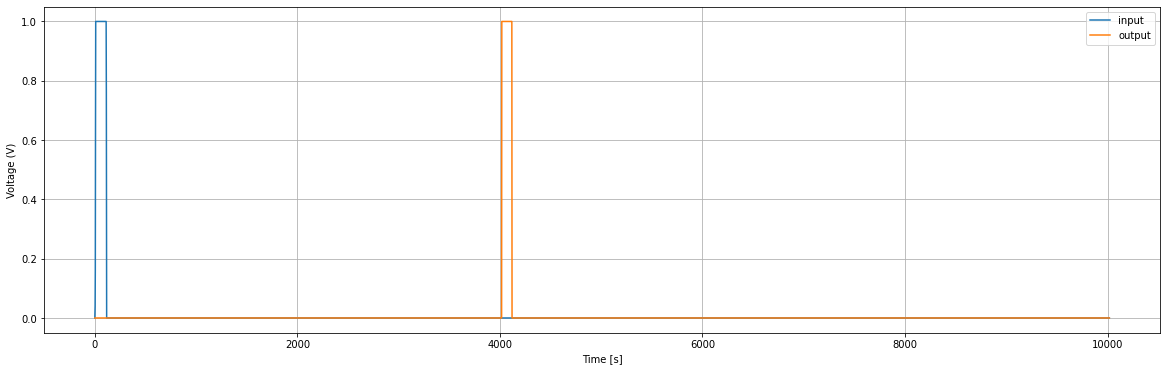

In [ ]:

circuit = Circuit('Transmission Line')
circuit.PulseVoltageSource('pulse', 'input', circuit.gnd, 0@u_V, 1@u_V, 1@u_ns, 1@u_us)
circuit.LosslessTransmissionLine('delay', 'output', circuit.gnd, 'input', circuit.gnd,
                                 impedance=50, time_delay=40e-9)
circuit.R('load', 'output', circuit.gnd, 50@u_Ω)

simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(step_time=1e-11, end_time=100e-9)


figure, ax = plt.subplots(figsize=(20, 6))
ax.plot(analysis['input'])
ax.plot(analysis['output'])
ax.set_xlabel('Time [s]')
ax.set_ylabel('Voltage (V)')
ax.grid()
ax.legend(['input', 'output'], loc='upper right')


